In [3]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

In [4]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header= None)

In [41]:
df_train.shape

(60000, 785)

In [87]:
df_sample = df_train.sample(10000, random_state=1)
X = df_sample.iloc[:, 1:].values
y = df_sample.iloc[:, 0]

scaler = preprocessing.StandardScaler()
X_std = scaler.fit_transform(X.astype(np.float32))

pca = decomposition.PCA(n_components=100)
X_pca = pca.fit_transform(X_std)

X.shape

(10000, 784)

In [92]:
%%time
km = cluster.KMeans(n_clusters=10, init="k-means++", n_init = 10, 
            max_iter = 1000, tol = 1e-04, random_state=0)
y_cluster = km.fit_predict(X_std)

print("homogeneity_score: ", metrics.homogeneity_score(y, y_cluster))

homogeneity_score:  0.393404432197
CPU times: user 11 s, sys: 199 ms, total: 11.2 s
Wall time: 10.3 s


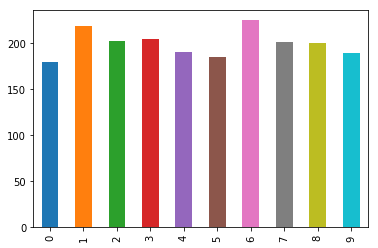

In [61]:
y.value_counts().sort_index().plot.bar()

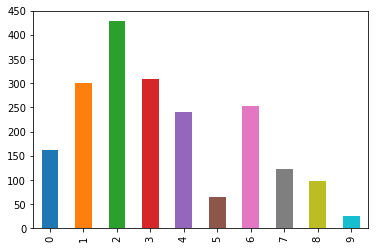

In [62]:
pd.Series(y_cluster).value_counts().sort_index().plot.bar()

In [64]:
pd.Series(y_cluster).value_counts()

2    428
3    309
1    300
6    253
4    240
0    162
7    122
8     97
5     64
9     25
dtype: int64

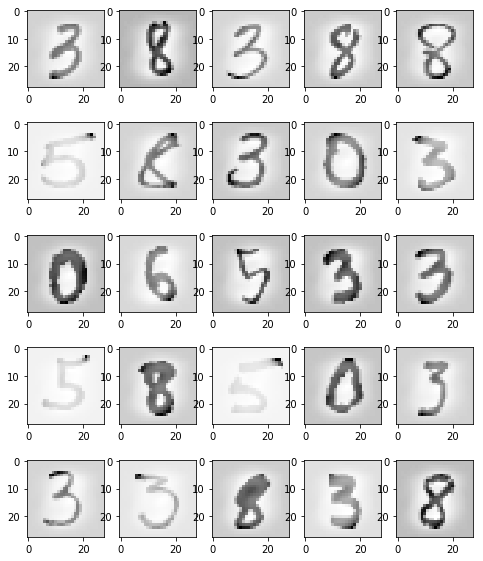

In [65]:
fig, _ = plt.subplots(5, 5, figsize = (8, 10))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_std[y_cluster == 1][i].reshape(28, 28), cmap="Greys")

In [75]:
dbscan = cluster.DBSCAN(eps=100, min_samples=5, metric="euclidean")
y_db = dbscan.fit_predict(X_pca)
metrics.homogeneity_score(y, y_db)
pd.Series(y_db).value_counts()

 0    1999
-1       1
dtype: int64